In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from READ_ART_bigendian import read_ART

path = '/Users/santiastro1/Documents/GitHub/ART_pure_Nbody/RODIN/'
# filename = 'PMcrs0.DAT'
# filename = 'PMcrs0a0.6000.DAT'
filename = 'PMcrs0_ini.DAT'
# nstars = 500016 ## From the RODIN ICs generator
# nstars = 19992470 ## From the RODIN ICs generator
nstars = 500016 + 133341

mass,x,y,z,vx,vy,vz,Id=read_ART(path,filename,nstars)


discovered %s:%s particle_header /Users/santiastro1/Documents/GitHub/ART_pure_Nbody/RODIN/PMcrd_ini.DAT
discovered %s:%s particle_data /Users/santiastro1/Documents/GitHub/ART_pure_Nbody/RODIN/PMcrs0_ini.DAT
[array([b': Npd=5e6 L=1/hMpc C=18.  Mh=1.05e11 Mo/     '], dtype='|S45')
 array([0.644], dtype=float32) array([0.], dtype=float32)
 array([0.], dtype=float32) array([0.00025], dtype=float32)
 array([0], dtype=int32) array([8.], dtype=float32)
 array([0.], dtype=float32) array([2.5952132e+13], dtype=float32)
 array([0.], dtype=float32) array([0.], dtype=float32)
 array([0.], dtype=float32) array([0.], dtype=float32)
 array([128], dtype=int32) array([256], dtype=int32)
 array([6], dtype=int32) array([1113490445], dtype=int32)
 array([0.3], dtype=float32) array([0.7], dtype=float32)
 array([0.7], dtype=float32) array([0.], dtype=float32)
 array([0.], dtype=float32)
 array([ 10.685208,  21.370417,  42.740833,  85.48167 , 170.96333 ,
       341.92667 ,   0.      ,   0.      ,   0.      ,

In [27]:
np.max(x[1])

1540292.8334678966

In [51]:
df = pd.DataFrame()
df['Id'] = Id[0]
df['x'], df['y'], df['z'] = x[0], y[0], z[0]
df['vx'], df['vy'], df['vz'] = vx[0], vy[0], vz[0]
df['mass'] = mass[0]
df['specie'] = 'Star'

for i in range(1,len(x)):
    
    df_aux = pd.DataFrame()
    df_aux['Id'] = Id[i]
    df_aux['x'], df_aux['y'], df_aux['z'] = x[i], y[i], z[i]
    df_aux['vx'], df_aux['vy'], df_aux['vz'] = vx[i], vy[i], vz[i]
    df_aux['mass'] = mass[i]
    df_aux['specie'] = 'DM'+str(i)
    df = pd.concat([df,df_aux], ignore_index=True)
    
df


,Id,x,y,z,vx,vy,vz,mass,specie
0,0,42.323019,-0.025397,25.382397,0.237678,1.805850,-0.085341,5.920832e+04,Star
1,1,42.418050,-0.062877,25.397587,-1.256632,0.758764,0.133747,5.920832e+04,Star
2,2,42.324390,0.116794,25.328603,2.545403,0.374752,0.390639,5.920832e+04,Star
3,3,42.448594,0.147228,25.489438,0.192219,-1.375018,-0.499074,5.920832e+04,Star
4,4,42.505733,-0.097781,25.532320,-0.558387,0.158501,1.088692,5.920832e+04,Star
...,...,...,...,...,...,...,...,...,...
5536311,5536312,5.984500,-293.264210,49.055710,-0.000000,0.000000,0.000000,1.894666e+06,DM6
5536312,5536313,-22.258374,254.157020,150.438769,0.000000,-0.000000,-0.000000,1.894666e+06,DM6
5536313,5536314,119.856959,-33.546537,-273.423669,0.000000,0.000000,0.000000,1.894666e+06,DM6
5536314,5536315,-22.187663,-281.170879,-108.006401,0.000000,0.000000,0.000000,1.894666e+06,DM6


In [52]:
mask_star = df['specie'] == 'Star'
mask_DM1 = df['specie'] == 'DM1'
mask_DM2 = df['specie'] == 'DM2'
mask_DM3 = df['specie'] == 'DM3'

mask_DM = mask_DM1 | mask_DM2 | mask_DM3

masks = [mask_star, mask_DM, mask_DM1, mask_DM2, mask_DM3]
title = ['Stars', 'DM', 'DM1', 'DM2', 'DM3']

# masks = [mask_star, mask_DM1, mask_DM2, mask_DM3]
# title = ['Stars', 'DM1', 'DM2', 'DM3']

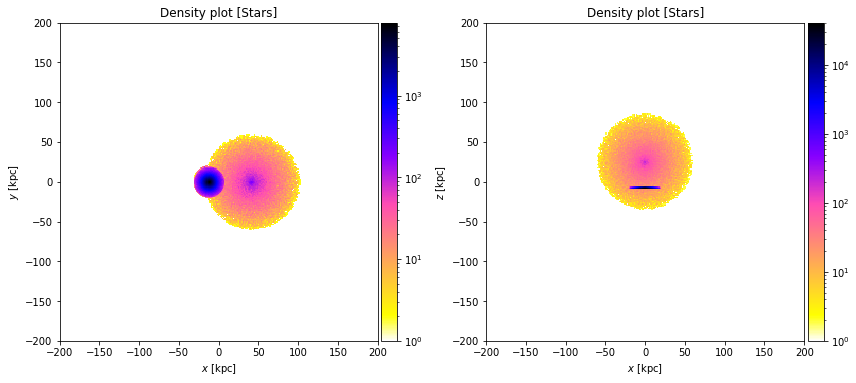

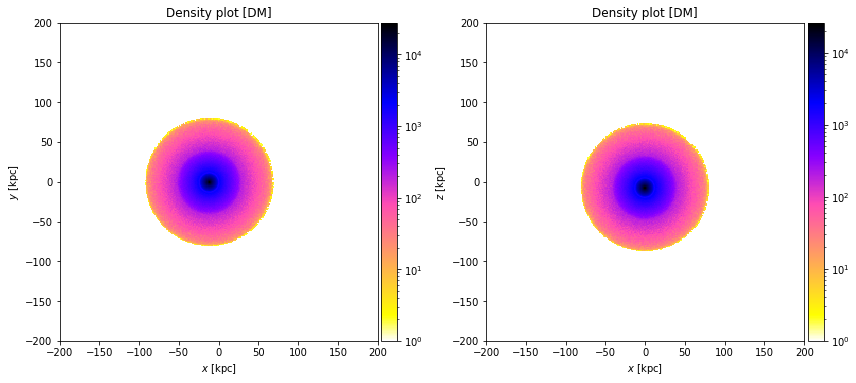

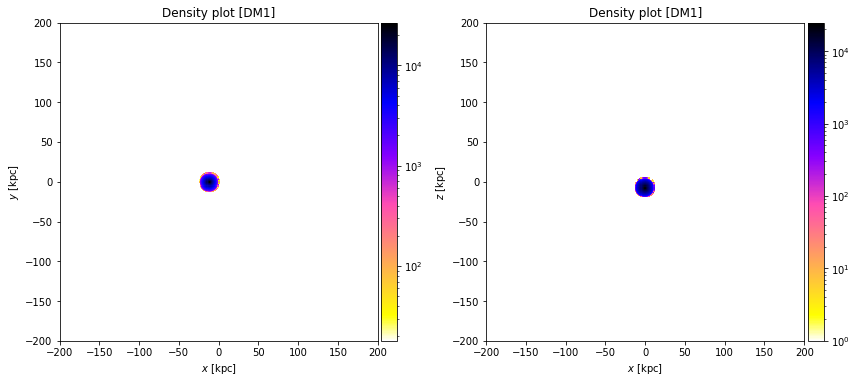

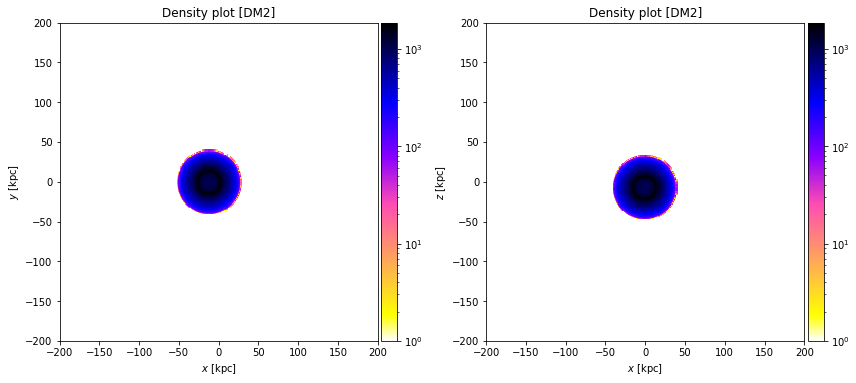

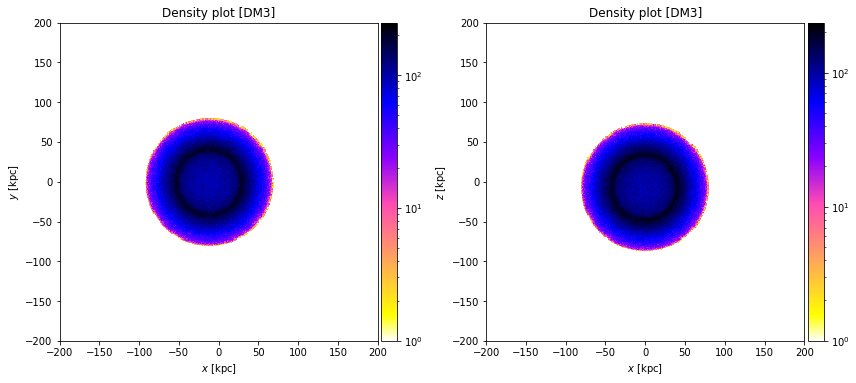

In [53]:
for i in range(len(masks)):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(121)
    plt.hist2d(df[masks[i]]['x'], df[masks[i]]['y'], bins=(300, 300), range=[[-200,200],[-200,200]], norm=mpl.colors.LogNorm(), cmap=plt.cm.gnuplot2_r)
    plt.xlabel(r"$x$ [kpc]")
    plt.ylabel(r"$y$ [kpc]")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(cax=cax)
    ax.set_title(r'Density plot ['+str(title[i])+']')
#     ax.set_xlim(-200,200)
#     ax.set_ylim(-200,200)
    ax.set_xlim(-200,200)
    ax.set_ylim(-200,200)
    ax.set_aspect('equal', adjustable='box')

    ax2 = fig.add_subplot(122)
    plt.hist2d(df[masks[i]]['y'], df[masks[i]]['z'], bins=(300, 300), range=[[-200,200],[-200,200]], norm=mpl.colors.LogNorm(), cmap=plt.cm.gnuplot2_r)
    plt.xlabel(r"$x$ [kpc]")
    plt.ylabel(r"$z$ [kpc]")
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(cax=cax2)
    ax2.set_title(r'Density plot ['+str(title[i])+']')
#     ax2.set_xlim(-200,200)
#     ax2.set_ylim(-200,200)
    ax2.set_xlim(-200,200)
    ax2.set_ylim(-200,200)
    ax2.set_aspect('equal', adjustable='box')

    fig.tight_layout()
    plt.show()

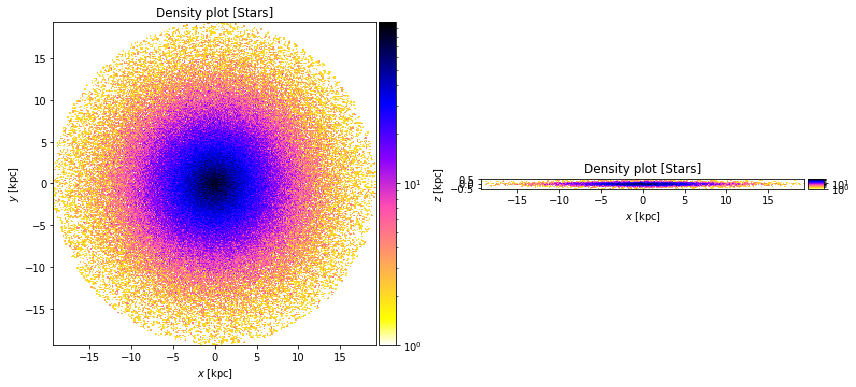

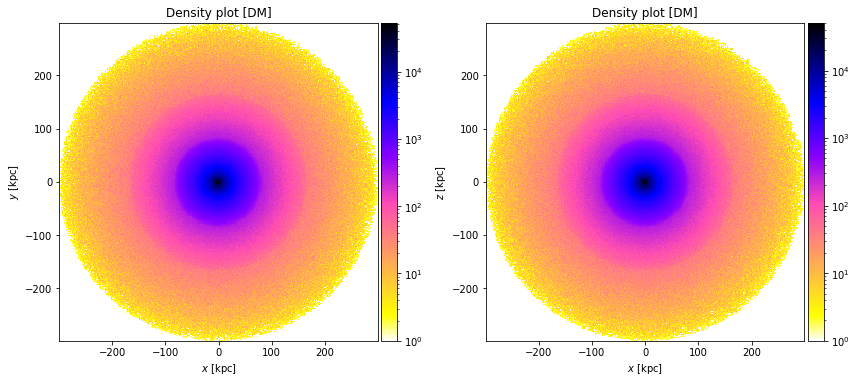

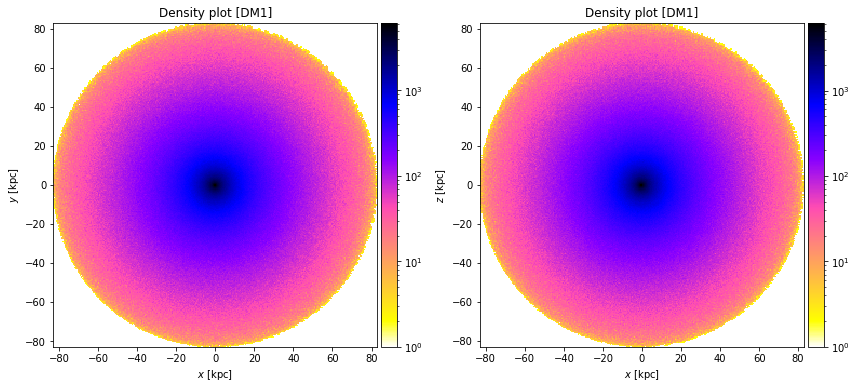

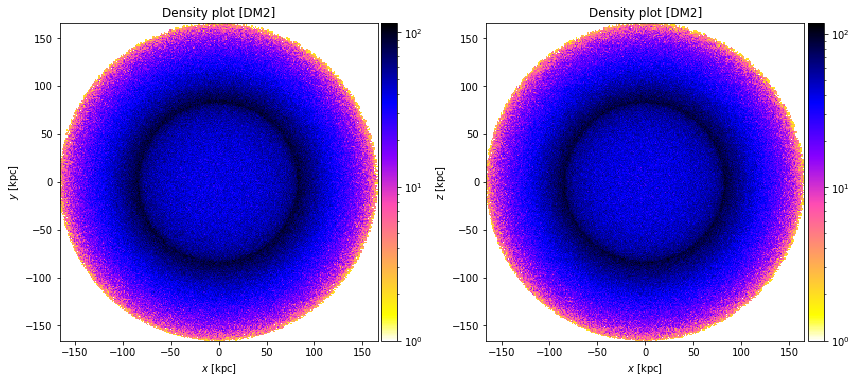

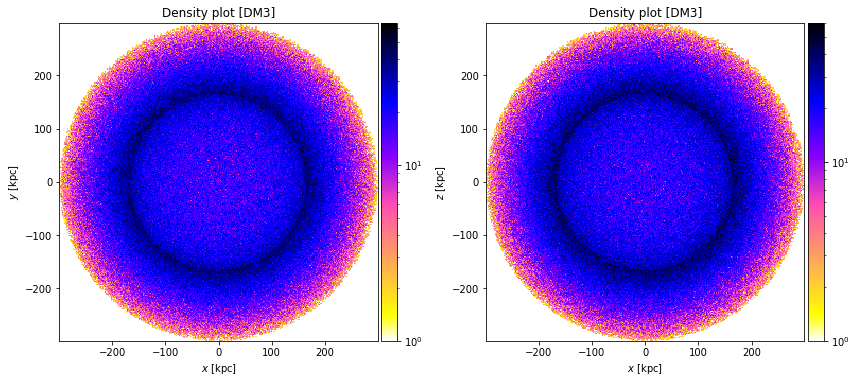

In [54]:
for i in range(len(masks)):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(121)
    plt.hist2d(df[masks[i]]['x'], df[masks[i]]['y'], bins=(300, 300), norm=mpl.colors.LogNorm(), cmap=plt.cm.gnuplot2_r)
    plt.xlabel(r"$x$ [kpc]")
    plt.ylabel(r"$y$ [kpc]")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(cax=cax)
    ax.set_title(r'Density plot ['+str(title[i])+']')
    ax.set_aspect('equal', adjustable='box')

    ax2 = fig.add_subplot(122)
    plt.hist2d(df[masks[i]]['x'], df[masks[i]]['z'], bins=(300, 300), norm=mpl.colors.LogNorm(), cmap=plt.cm.gnuplot2_r)
    plt.xlabel(r"$x$ [kpc]")
    plt.ylabel(r"$z$ [kpc]")
    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(cax=cax2)
    ax2.set_title(r'Density plot ['+str(title[i])+']')
    ax2.set_aspect('equal', adjustable='box')

    fig.tight_layout()
    plt.show()

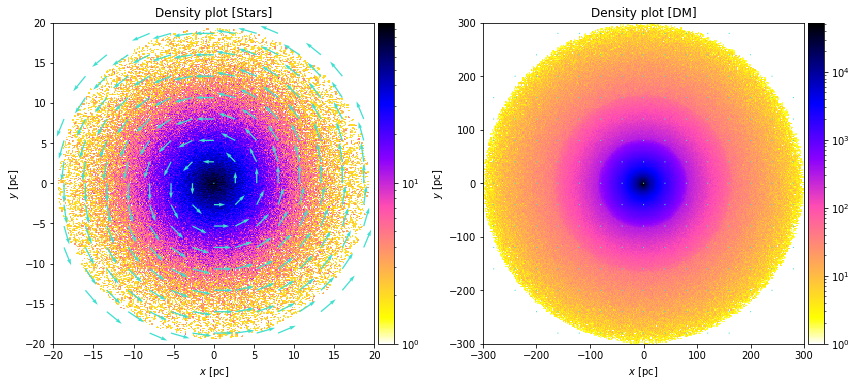

In [50]:
import scipy
from scipy import stats

nbins_vf = 15

xmin_stars, xmax_stars = -20, 20
ymin_stars, ymax_stars = -20, 20

xmin_DM, xmax_DM = -300, 300
ymin_DM, ymax_DM = -300, 300


median_vx_stars = scipy.stats.binned_statistic_2d(df[mask_star]['x'], df[mask_star]['y'], df[mask_star]['vx'], statistic='median',
                                                  bins=nbins_vf, range= [[xmin_stars, xmax_stars], [ymin_stars, ymax_stars]], expand_binnumbers=False).statistic
median_vy_stars = scipy.stats.binned_statistic_2d(df[mask_star]['x'], df[mask_star]['y'], df[mask_star]['vy'], statistic='median',
                                                  bins=nbins_vf, range= [[xmin_stars, xmax_stars], [ymin_stars, ymax_stars]], expand_binnumbers=False).statistic

median_vx_DM = scipy.stats.binned_statistic_2d(df[mask_DM]['x'], df[mask_DM]['y'], df[mask_DM]['vx'], statistic='median',
                                               bins=nbins_vf, range= [[xmin_DM, xmax_DM], [ymin_DM, ymax_DM]], expand_binnumbers=False).statistic
median_vy_DM = scipy.stats.binned_statistic_2d(df[mask_DM]['x'], df[mask_DM]['y'], df[mask_DM]['vy'], statistic='median',
                                               bins=nbins_vf, range= [[xmin_DM, xmax_DM], [ymin_DM, ymax_DM]], expand_binnumbers=False).statistic


ret_median_star = scipy.stats.binned_statistic_2d(df[mask_star]['x'], df[mask_star]['y'], df[mask_star]['vx'], statistic='median',
                                                  bins=nbins_vf, range= [[xmin_stars, xmax_stars], [ymin_stars, ymax_stars]], expand_binnumbers=False)

ret_median_DM = scipy.stats.binned_statistic_2d(df[mask_DM]['x'], df[mask_DM]['y'], df[mask_DM]['vx'], statistic='median',
                                                bins=nbins_vf, range= [[xmin_DM, xmax_DM], [ymin_DM, ymax_DM]], expand_binnumbers=False)


xedge=ret_median_star.x_edge
yedge=ret_median_star.y_edge

Xcentre_star=0.5*(xedge[1:]+xedge[:-1])
Ycentre_star=0.5*(yedge[1:]+yedge[:-1])
Xcentre_star,Ycentre_star=np.meshgrid(Xcentre_star,Ycentre_star)

Xcentre_star=Xcentre_star.T
Ycentre_star=Ycentre_star.T


xedge=ret_median_DM.x_edge
yedge=ret_median_DM.y_edge

Xcentre_DM=0.5*(xedge[1:]+xedge[:-1])
Ycentre_DM=0.5*(yedge[1:]+yedge[:-1])
Xcentre_DM,Ycentre_DM=np.meshgrid(Xcentre_DM,Ycentre_DM)

Xcentre_DM=Xcentre_DM.T
Ycentre_DM=Ycentre_DM.T



fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
plt.hist2d(df[mask_star]['x'], df[mask_star]['y'], bins=(300, 300), norm=mpl.colors.LogNorm(), cmap=plt.cm.gnuplot2_r)
ax.quiver(Xcentre_star, Ycentre_star, median_vx_stars, median_vy_stars, color='turquoise', scale=500, scale_units='inches') 
plt.xlabel(r"$x$ [pc]")
plt.ylabel(r"$y$ [pc]")
ax.set_xlim(xmin_stars, xmax_stars)
ax.set_ylim(ymin_stars, ymax_stars)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax)
ax.set_title(r'Density plot [Stars]')
ax.set_aspect('equal', adjustable='box')

ax2 = fig.add_subplot(122)
plt.hist2d(df[mask_DM]['x'], df[mask_DM]['y'], bins=(300, 300), norm=mpl.colors.LogNorm(), cmap=plt.cm.gnuplot2_r)
ax2.quiver(Xcentre_DM, Ycentre_DM, median_vx_DM, median_vy_DM, color='turquoise', scale=500, scale_units='inches') 
plt.xlabel(r"$x$ [pc]")
plt.ylabel(r"$y$ [pc]")
ax2.set_xlim(xmin_DM, xmax_DM)
ax2.set_ylim(ymin_DM, ymax_DM)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax2)
ax2.set_title(r'Density plot [DM]')
ax2.set_aspect('equal', adjustable='box')

fig.tight_layout()
plt.show()



In [37]:
df[mask_star].tail(132552)['x']

500016    0.001990
500017   -0.030503
500018   -0.020157
500019   -0.020592
500020    0.000866
            ...   
632563   -0.433217
632564   -2.952042
632565    0.034126
632566   -2.705023
632567   -1.803775
Name: x, Length: 132552, dtype: float64

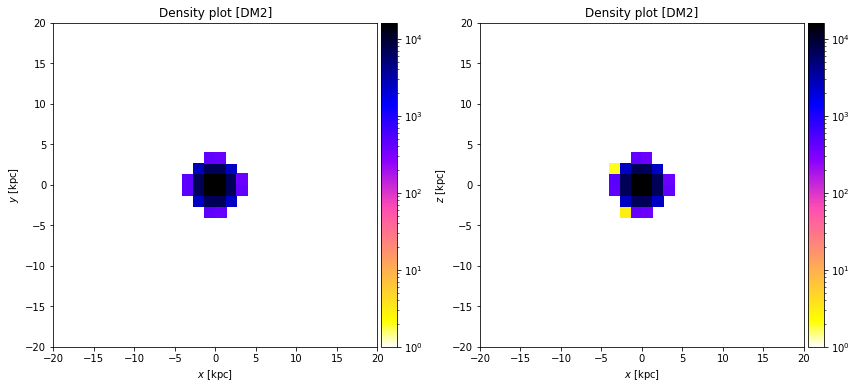

In [36]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
plt.hist2d(df[mask_star].tail(132552)['x'], df[mask_star].tail(132552)['y'], bins=(300, 300), range=[[-200,200],[-200,200]], norm=mpl.colors.LogNorm(), cmap=plt.cm.gnuplot2_r)
plt.xlabel(r"$x$ [kpc]")
plt.ylabel(r"$y$ [kpc]")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax)
ax.set_title(r'Density plot ['+str(title[i])+']')
#     ax.set_xlim(-200,200)
#     ax.set_ylim(-200,200)
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal', adjustable='box')

ax2 = fig.add_subplot(122)
plt.hist2d(df[mask_star].tail(132552)['x'], df[mask_star].tail(132552)['z'], bins=(300, 300), range=[[-200,200],[-200,200]], norm=mpl.colors.LogNorm(), cmap=plt.cm.gnuplot2_r)
plt.xlabel(r"$x$ [kpc]")
plt.ylabel(r"$z$ [kpc]")
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax2)
ax2.set_title(r'Density plot ['+str(title[i])+']')
#     ax2.set_xlim(-200,200)
#     ax2.set_ylim(-200,200)
ax2.set_xlim(-20,20)
ax2.set_ylim(-20,20)
ax2.set_aspect('equal', adjustable='box')

fig.tight_layout()
plt.show()